#   Title: Heart Disease prediction
`Author`: M.Ahmed Raza\
`Date`: 17FEB2024\
`Dataset`: UCI Heart Disease

### Meta Data
About Dataset
Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. 
It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. 
This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them.
The Cleveland database is the only one used by ML researchers to date. 
One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
    * 1.typical angina
    * 2.atypical angina 
    * 3.non-anginal
    * 4.asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute
  
### Acknowledgements
### Creators:
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.\
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.\
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.\
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.\
### Relevant Papers:
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link
Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

# Aims & Objectives
1. most of the plots are made twice, to check the comparison between plotly ans seaborb plots.

will write it at the end

# 00-Data Loading

In [24]:
#import libraries
#1. to handle the data
import pandas as pd 
import numpy as np

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to process the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# to import onehotencoder
from sklearn.preprocessing import OneHotEncoder

# to import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

# for classfication
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#for metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_absolute_error,r2_score,mean_squared_error,f1_score,precision_score,recall_score

# impot pipeline
from sklearn.pipeline import Pipeline

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [25]:
#load dataset locally
df = pd.read_csv('./heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


---

# 01-Exploratory data analysis

## Data Shape and Info

In [26]:
# Exploring data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [27]:
#shape of the data
print('There are {} rows and {} columns in the dataset'.format(df.shape[0],df.shape[1]))

There are 920 rows and 16 columns in the dataset


In [28]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

## Null/Missing Data
if we want the , Imputing of Nuemerical Columns Only we can do without function, however if cat data is involved we need encoding before imputation that requires different approach.

In [29]:
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64

we want to do wih fuction, threfore cells are commented out 

In [30]:
# #filter float64 data type and null values
# df.select_dtypes(include=['float64']).isnull().sum().sort_values(ascending=False)

In [31]:
#imputer null values using iterative imputer for ca, oldpeak, thalch, chol

# #create iterative imputer
# imputer = IterativeImputer(max_iter=10, random_state=42)
# #fit and transform
# df[['ca', 'oldpeak', 'thalch', 'chol','trestbps']] = imputer.fit_transform(df[['ca', 'oldpeak', 'thalch', 'chol','trestbps']])
# #check and rint
# # Check and print the imputed values for 'trestbps'
# print(f'Missing value are {df["ca"].isnull().sum()}')
# print(f'Missing value are {df["oldpeak"].isnull().sum()}')
# print(f'Missing value are {df["thalch"].isnull().sum()}')
# print(f'Missing value are {df["chol"].isnull().sum()}')
# print(f'Missing value are {df["trestbps"].isnull().sum()}')

In [32]:
# #thal value count and null values
# # Count of 'thal' values and number of null values
# df['thal'].value_counts(dropna=False)

### Imputing null data with function

In [33]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [34]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [35]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [36]:

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.177514450867053 

RMSE = 17.10555108830704 

R2 = 0.08640873627561318 

Missing Values chol : 3.26%
MAE = 44.763988764044946 

RMSE = 63.29340720855068 

R2 = 0.6826521239839284 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.31 accuracy

Missing Values restecg : 0.22%


The feature 'restecg' has been imputed with 64.13 accuracy

Missing Values thalch : 5.98%
MAE = 16.74780346820809 

RMSE = 21.55196791036142 

R2 = 0.32459670188973044 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.03 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5634651162790697 

RMSE = 0.7913862726621808 

R2 = 0.40332894375910355 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 68.29 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 64.52 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 73.56 accuracy



In [37]:
len(df)

920

In [38]:
#checking the null data in the dataset
print("Null Data in the Dataset: ", df.isnull().sum())
print("Number of Null Values: ", df.isnull().sum().sum())
print("Percentage of Null Values: ", round(((df.isnull().sum().sum())/len(df))*100,2),"%")    


Null Data in the Dataset:  id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
Number of Null Values:  0
Percentage of Null Values:  0.0 %


All null data has been imputed sucesssfully.

----

# 02-Data Pre-Processing
## Outliers

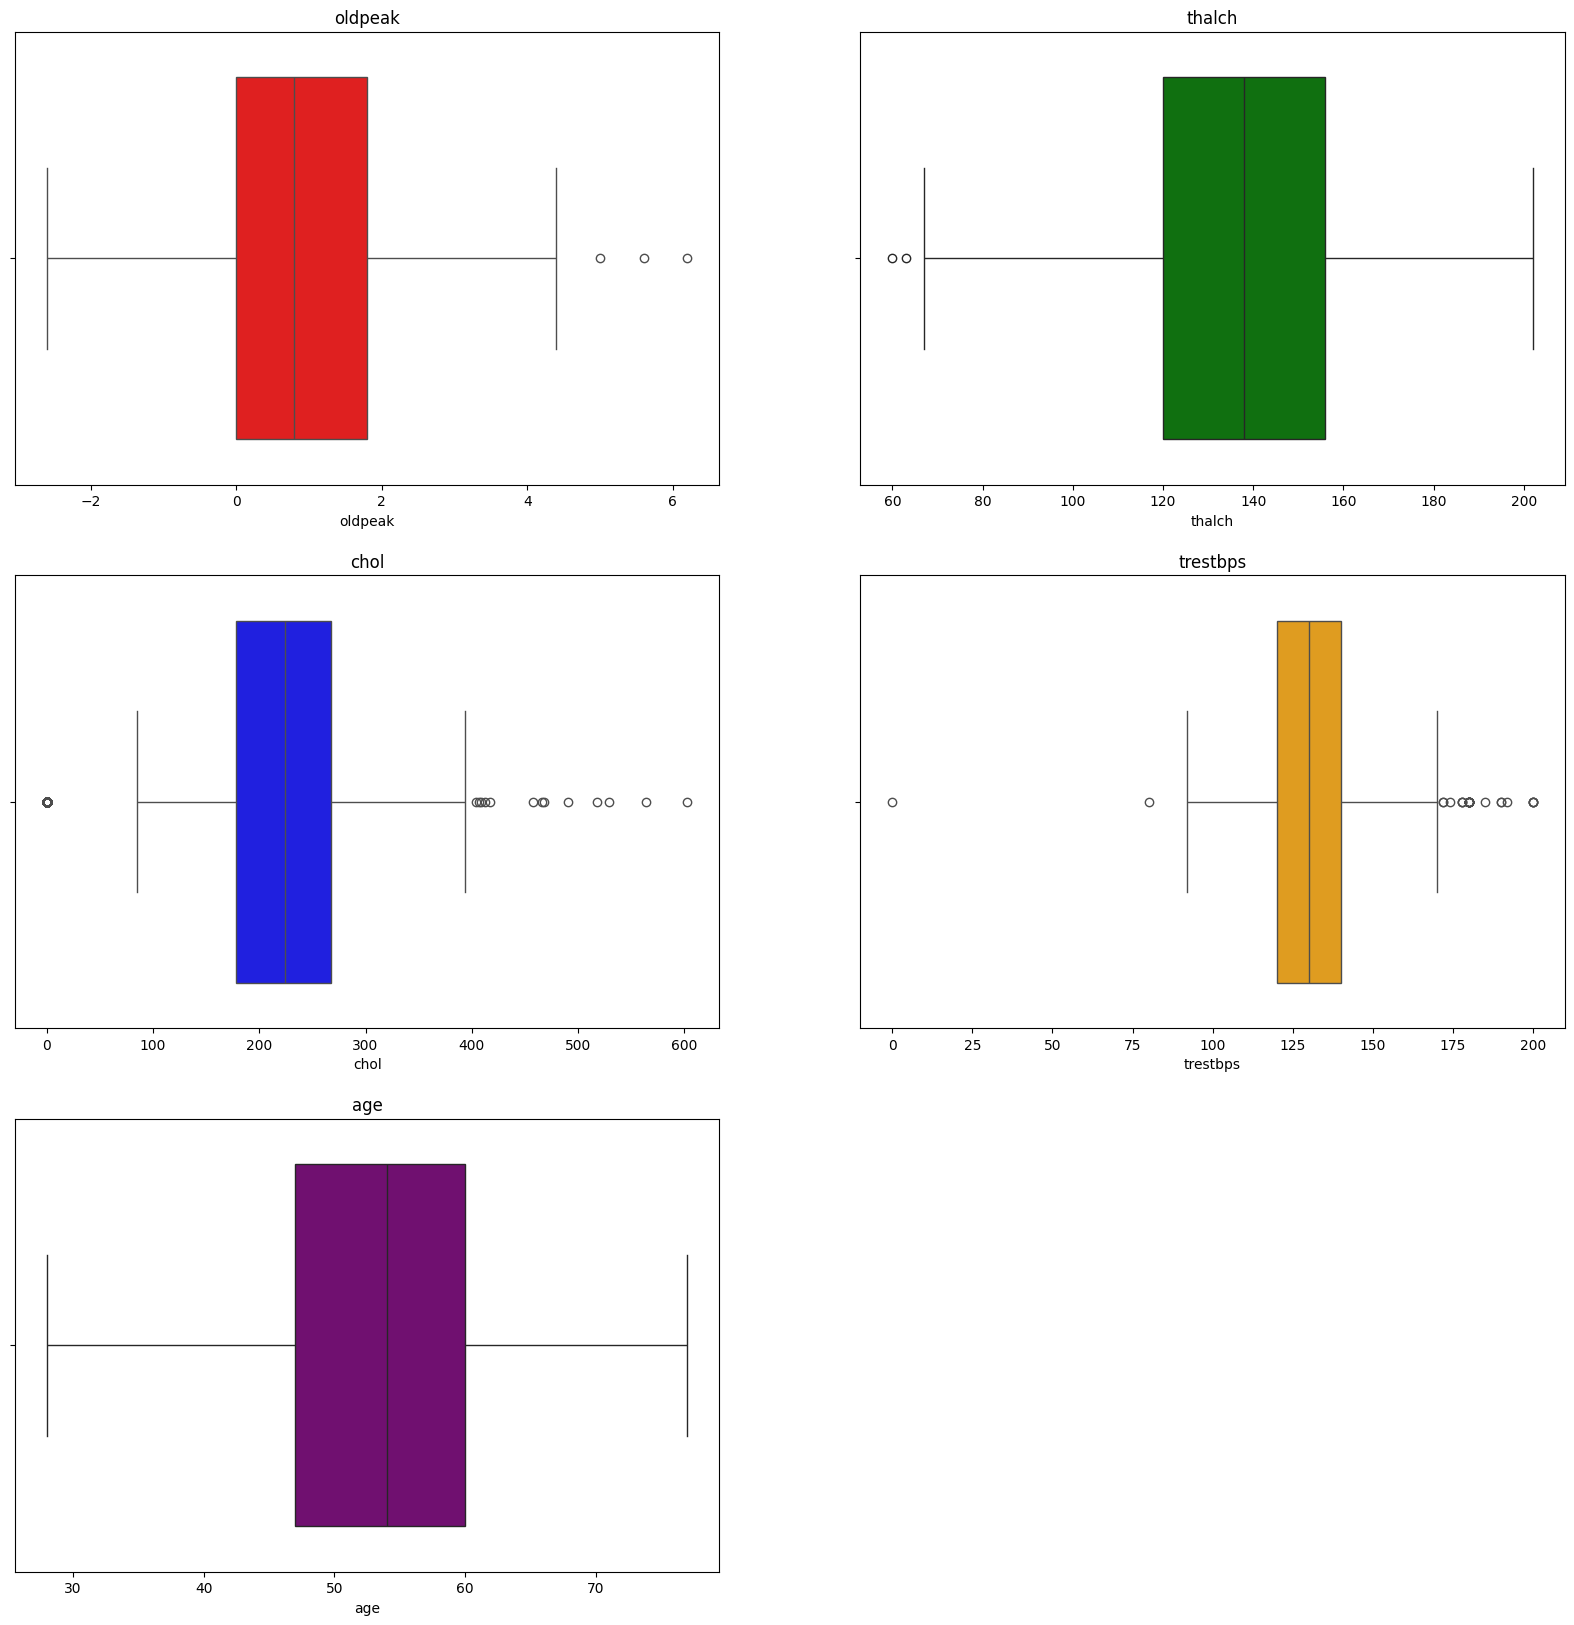

In [39]:
#create a boxplot using for loop and in subplots
plt.figure(figsize=(20,20))
colors=['red','green','blue','orange','purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

Now Boxplots using plotly
plotly plots are interactive

In [40]:
# create boxplot using plotly and for loop
for col in df.select_dtypes(include=['number']).columns:
    fig = px.box(df, y=col)
    fig.show()

In [41]:
# create boxplots using plotly 
import plotly.graph_objs as go
fig = go.Figure()

for i, col in enumerate(numeric_cols):
    fig.add_trace(go.Box(y=df[col], name=col))

fig.update_layout(title='Boxplots of Numerical Columns',    
                  xaxis_title='Columns',
                  yaxis_title='Values')

fig.show()

In [17]:
# # we are dropping the data which is not possible.
# #print the row with trestbps = 0
# df[df['trestbps'] == 0]
# #remove the row with trestbps = 0
# df = df[df['trestbps'] != 0]
# df[df['trestbps'] == 0]
# #remove the row with chol = 0
# df = df[df['chol'] != 0]
# df[df['chol'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


---

# 03-Inferential Statistics

Understanding, columns sttistics
## Age

In [42]:
df.age.describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [43]:
# print mean of age
print(f'Most of the people with heart disease have ages between {df["age"].min()} and {df["age"].max()}')
print(f'Mean age for heart disease is {int(df["age"].mean())}')
print(f'Median age for heart disease is {int(df["age"].median())}')
print(f'Most of the people with heart disease is of age {int(df["age"].mode()[0])}')



Most of the people with heart disease have ages between 28 and 77
Mean age for heart disease is 53
Median age for heart disease is 54
Most of the people with heart disease is of age 54


Now visualizing these stats

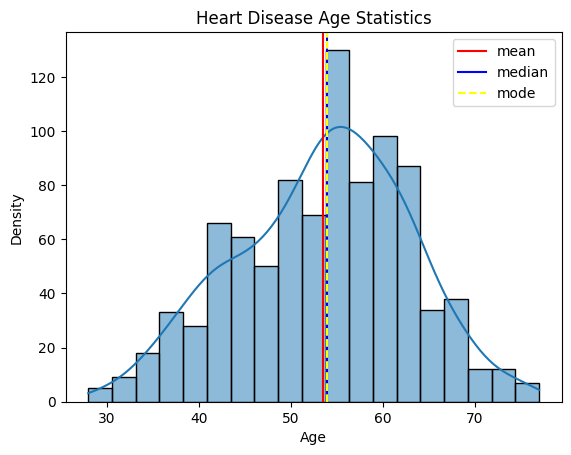

In [44]:
sns.histplot(df['age'], kde=True)
#plot the mean, median and mod of the age
plt.axvline(x=df['age'].mean(), color='red', label='mean')
plt.axvline(x=df['age'].median(), color='blue', label='median')
plt.axvline(x=df['age'].mode()[0], color='yellow',linestyle='dashed', label='mode')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Heart Disease Age Statistics')

plt.legend()
plt.show()

Lets explore it by gender wise

In [45]:
#plot histogram of age distribution by sex using plotly
fig = px.histogram(df, x='age', color='sex')
fig.show()

In [46]:
#find the value count of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [47]:
#print percentage of male and female
df['sex'].value_counts(normalize=True)

sex
Male      0.78913
Female    0.21087
Name: proportion, dtype: float64

In [48]:
# how much male is more than female
male_proportion = 0.78913
female_proportion = 0.21087

ratio = male_proportion / female_proportion
print("The value of males is", ratio, "times larger than females.")

The value of males is 3.742258263385024 times larger than females.


In [49]:
#find the value count og age column groupby sex
df['age'].groupby(df['sex']).value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

## Country ? - Dataset


In [50]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [51]:
print(f'The data belongs to follwing sources:\n{df.dataset.value_counts()}')

The data belongs to follwing sources:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


In [52]:
df.dataset.value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

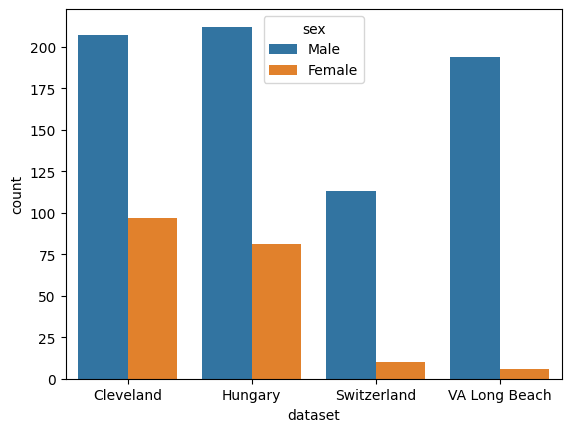

In [53]:
#plot the value count of dataset hue by sex
sns.countplot(data=df, x='dataset', hue='sex')
plt.show()

In [54]:
#plot dataset using plotly hue sex
fig = px.histogram(df, x='dataset', color='sex')
fig.update_layout(title='Value Count of Dataset by Sex')
fig.show()

In [61]:
#make a plotly plot of age column hue dataset
fig = px.histogram(df, x='age', color='dataset')
fig.show()

In [65]:
#print the mean median and mod of age groupby dataset
print(f"The mean age for heart disease is {df.groupby('dataset')['age'].agg(['mean','median']).round(2)}")
#print mod of age groupby dataset
print(f"MOD is:{df.groupby('dataset')['age'].agg(pd.Series.mode)}")

The mean age for heart disease is                 mean  median
dataset                     
Cleveland      54.35    55.5
Hungary        47.89    49.0
Switzerland    55.32    56.0
VA Long Beach  59.35    60.0
MOD is:dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


## CP(Chest Pain)

Checking the types of chest pain and number of cases with it.

In [60]:
df.cp.value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

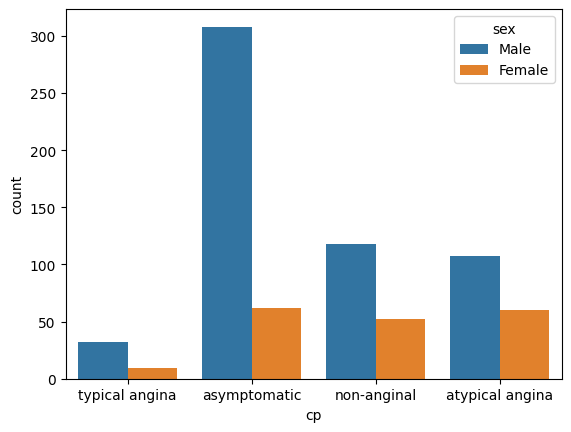

In [64]:
#count plot of cp by sex
sns.countplot(data=df, x='cp', hue='sex')
plt.show()

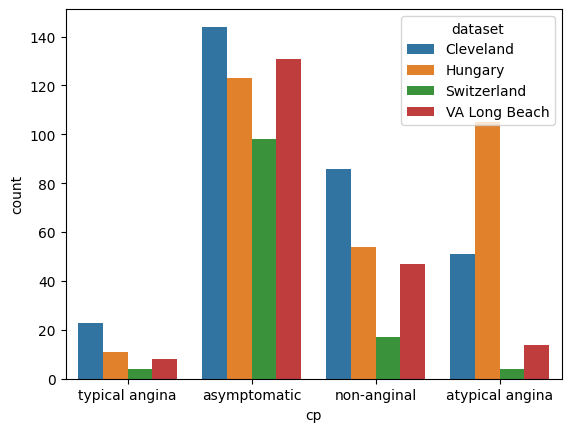

In [66]:
# count plot of cp by dataset
sns.countplot(data=df, x='cp', hue='dataset')
plt.show()

In [68]:
# plot in ploty for the same
fig = px.histogram(df, x='cp', color='sex')
fig.update_layout(title='Value Count of Chest Pain Type with Sex')
fig.show()

In [65]:
# draw a plotly plot of age groupby cp
fig = px.histogram(df, x='age', color='cp')
fig.show()

## trestbps column
the normal resting blood pressure is 120/80

In [ ]:
df.trestbps.describe()

In [ ]:
df.info()

<span style="color: yellow; font-size: 350%; font-weight: bold;">Machine Learning</span>

In [66]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
df['num'].value_counts()

The Target Column is `num` which is the predicted attribute. We will use this column to predict the heart disease. 
The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.
* `0 = no heart disease`
* `1 = mild heart disease`
* `2 = moderate heart disease `
* `3 = severe heart disease`
* `4 = critical heart disease `

In [67]:
#split the data
X=df.drop('num', axis=1)
y=df['num']

#encode the data using label encoder for loop
for col in X.select_dtypes(include=['object'] or 'category').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
#models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_score = 0

#iterATE THROUGH THE MODELS AND FIT THE DATA USING PIPELINES
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])
#perform cross validation
    score = cross_val_score(pipeline, X_train, y_train, cv=5)
#mean accuracy
    mean_accuracy=score.mean()
#make predictions
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
#calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
#print metrics
    print(f"Model: {name}")
    print(f"Mean Accuracy: {mean_accuracy}")
    print(f"Accuracy: {accuracy}")
    print()
#check for best model
    if mean_accuracy > best_score:
        best_score = mean_accuracy
        best_model = name
#print best model
print(f"Best Model: {best_model}")
print(f"Best Score: {best_score}")



Model: Random Forest
Mean Accuracy: 0.7091456582633053
Accuracy: 0.6533333333333333
score[0.675      0.65       0.73333333 0.78151261 0.70588235]

Model: Gradient Boosting
Mean Accuracy: 0.7007002801120448
Accuracy: 0.6733333333333333
score[0.70833333 0.65       0.725      0.75630252 0.66386555]

Model: Support Vector Machine
Mean Accuracy: 0.6422689075630252
Accuracy: 0.62
score[0.60833333 0.59166667 0.65       0.70588235 0.65546218]

Model: Logistic Regression
Mean Accuracy: 0.5719467787114847
Accuracy: 0.5733333333333334
score[0.525      0.56666667 0.6        0.58823529 0.57983193]

Model: K-Nearest Neighbors
Mean Accuracy: 0.6171568627450981
Accuracy: 0.6333333333333333
score[0.65       0.55       0.59166667 0.63865546 0.65546218]

Model: Decision Tree
Mean Accuracy: 0.6621988795518208
Accuracy: 0.6266666666666667
score[0.71666667 0.56666667 0.70833333 0.71428571 0.60504202]

Model: Ada Boost
Mean Accuracy: 0.6186974789915967
Accuracy: 0.6066666666666667
score[0.58333333 0.6       

# 04- Outputs:
1. 
2. People get heart disease between age 27-77
3. Mean age for heart disease is 53
4. Median age for heart disease is 54
5. MOD of age with heart disease is 54
6. Most of the males and females get heart disease between age 54-55
7. 78% pateients are Male and 21% patients are female
8. There are 3.74 times more male heart patients than female
   1. The highest number of females are from clevland and lowest from Switzerland
   2.  The highest number of males are from Hungary and lowest from Switzerland
9. In every country the mean median and mod value of age is different:
   1.  Cleaveland has mean age of 54, median age 55, mod 58
   2.  Hungary has mean age of 48, median age 49, mod 54
   3.  Switzerland hhas mean age of 55, median age 56, mod 61
   4.  VA long beach has mean age of 59, median age 60 , mod 62,63
10. Observation about cp
11. write observation abt the rest of columns
12.   The mean and median age for heart disease is
             Mean    Median
Cleveland     54.35    55.5
Hungary       47.89    49.0
Switzerland   55.32    56.0
VA Long Beach 59.30    60.0
13. MOD of the age is:
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
